In [47]:
#2017 - 03 - 05
# So here newoption is the name of the table, so plays no further role.

# todaydate -- date when this information is collected (normally you won't use)

# settledate -- date of settlement for both weekly and monthly options (normally you won't use)

# daystosettle -- the difference, this you will use

# today_sp_price -- s&p 500 price today (normally you won't use explicitly)

# settle_sp_price -- s&p 500 price at settlement (of course we wouldn't
# know this if we were really trading. So this is kind of a target,
# though I would suggest either making profit on buy, profit on sale the target
# or the difference between settle_sp_price and today_sp_price to be the target).

# optiontype -- put or call

# optionstrike -- strike price of the option

# optionclosingprice -- closing price of the option at the end of the day

# optionhighprice -- high for the day

# optionlowprice -- low for the day

# optionvol -- volume for the day (unreliable for some reason so I wouldn't use)

# optionopenint -- how much is outstanding


# 'todaydate', 'settledate', 'daystosettle', 'today_sp_price', 'settle_sp_price', 'optiontype', 'optionstrike',
# 'optionclosingprice', 'optionhighprice', 'optionlowprice', 'optionvol', 'optionopenint'


# ... Let's say that you sell an option at the last sale and the option
# gets to settlement as has no value, then your profit is the price of your
# sale.
# To determine the value of a call option at settlement,
# if the S&P price at settlement is p, then the value of a call at strike k
# is max(p-k,0). So if p > k, the call has value.

# To determine the value of a put option at settlement,
# if the S&P price at settlement is p, then the value of a put at strike k
# is max(k-p,0). So if p < k the put has value.



#  if you start by estimating the range of the s&p 500 at settlement
# date, I suggest you do so as a range of fractions of today's price
# e.g. 0.7*sptoday ... 1.3*sptoday.




#2017 - 03 - 06
# Let's make our machine learning problem figuring out whether
# sp at settle date will be within 0.99 to 1.01 of sptoday
# 0.98 to 1.02 ... up to 0.9 to 1.1.

# The problem I set was too easy 0.7 of 2350 is hundreds of points away.




#2017 - 03 - 01
#Calls,Last Sale,Net,Bid,Ask,Vol,Open Int,
#Puts,Last Sale,Net,Bid,Ask,Vol,Open Int


# for each settlement date s
#   for d from say 3 to 14
#     for each option o pertaining to s that has at least open interest of 5000 as of time s-d
#        predict the profit or loss of selling o at time s-d
#        divided into categories profit of between 0 and $2, between $2 and $5, more than $5
#           loss of between 0 and $2, between $2 and $5, more than $5

# The information you want to use to figure this out for each option o includes information
# about all options pertaining to s, not just information about o.
# You want to include open interest, price of the option, volume, and historical information
# about these, as well as d itself.



# https://www.fool.com/investing/options/options-the-basics.aspx
# A call buyer seeks to make a profit when the price of the underlying shares rises. 
# The call price will rise as the shares do. The call writer is making the opposite bet, 
# hoping for the stock price to decline or, at the very least, rise less than the amount received 
# for selling the call in the first place.

# The put buyer profits when the underlying stock price falls. 
# A put increases in value as the underlying stock decreases in value. 
# Conversely, put writers are hoping for the option to expire with the stock price above the strike price, 
# or at least for the stock to decline an amount less than what they have been paid to sell the put.

# We'll note here that relatively few options actually expire and see shares change hands.
# Options are, after all, tradable securities. As circumstances change, 
# investors can lock in their profits (or losses) by buying (or selling) 
# an opposite option contract to their original action.





#TODO:
#From the web get inspired on how to visualize the data and do analysis.
#http://dataconomy.com/2015/03/14-best-python-pandas-features/


#Python 4 data analysis Wes McKinney's book.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


spx_df_relevant_options = pd.read_table("relevantoptions2", delimiter = ",")

todaydate_tmp=[pd.datetime.strptime(str(x), '%Y%m%d') for x in spx_df_relevant_options.todaydate]
spx_df_relevant_options.todaydate = todaydate_tmp


settledate_tmp=[pd.datetime.strptime(str(x), '%Y%m%d') for x in spx_df_relevant_options.settledate]
spx_df_relevant_options.settledate = settledate_tmp

num_options = spx_df_relevant_options.shape[0]
num_columns = spx_df_relevant_options.shape[1]


def opttype_to_bin(row):
    if row['optiontype'] == "put":
        return 0
    elif row['optiontype'] == "call":
        return 1

opttype_bin = spx_df_relevant_options.apply(lambda row: opttype_to_bin(row), axis=1)
spx_df_relevant_options['opttype_bin'] = opttype_bin


print spx_df_relevant_options.shape#(100742, 12)

spx_df_relevant_options



(100742, 13)


,todaydate,settledate,daystosettle,today_sp_price,settle_sp_price,optiontype,optionstrike,optionclosingprice,optionhighprice,optionlowprice,optionvol,optionopenint,opttype_bin
0,2013-07-09,2013-07-26,17,1652.32,1690.47,put,1580,2.825,2.90,2.75,128,6258,0
1,2013-07-09,2013-07-26,17,1652.32,1690.47,put,1580,2.825,2.90,2.75,128,6258,0
2,2013-07-09,2013-07-26,17,1652.32,1690.47,call,1650,18.000,18.40,17.60,4278,5233,1
3,2013-07-09,2013-07-26,17,1652.32,1690.47,call,1650,18.000,18.40,17.60,4278,5233,1
4,2013-07-10,2013-07-26,16,1652.62,1690.47,put,1580,2.325,2.50,2.15,107,6316,0
5,2013-07-10,2013-07-26,16,1652.62,1690.47,put,1580,2.325,2.50,2.15,107,6316,0
6,2013-07-10,2013-07-26,16,1652.62,1690.47,call,1650,19.200,19.80,18.60,2009,5446,1
7,2013-07-10,2013-07-26,16,1652.62,1690.47,call,1650,19.200,19.80,18.60,2009,5446,1
8,2013-07-11,2013-07-26,15,1675.02,1690.47,put,1580,1.050,1.20,0.90,78,6329,0
9,2013-07-11,2013-07-26,15,1675.02,1690.47,put,1580,1.050,1.20,0.90,78,6329,0


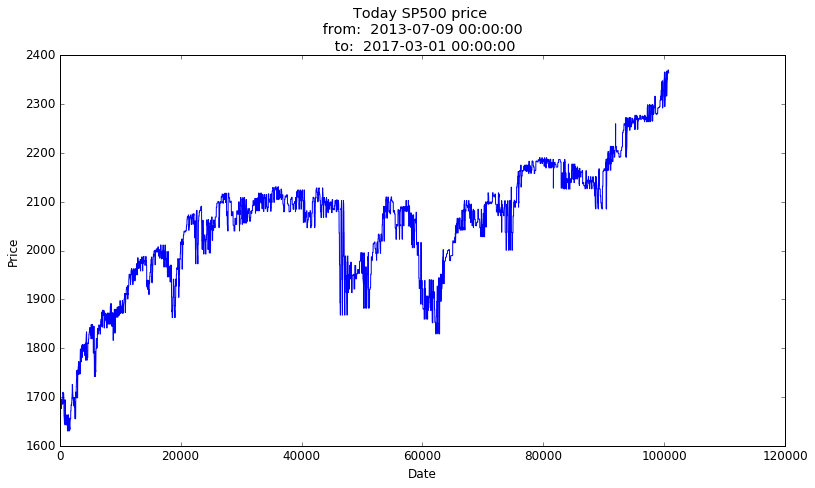

In [3]:
%matplotlib inline
import itertools
mpl.rcParams.update({'font.size': 12})
marker = itertools.cycle((',', '+', '.', 'o', '*'))
color = itertools.cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))

plt.clf()
plt.close()
fig = plt.figure(figsize=(13,7), dpi = 1000)
ax = fig.add_subplot(111)


ax.plot(spx_df_relevant_options['today_sp_price'].values, color=color.next())

ax.set_xlabel('Date')
ax.set_ylabel("Price")
ax.set_title("Today SP500 price \n from:  "+str(spx_df_relevant_options.todaydate[:1][0])+" \n to:  "+str(spx_df_relevant_options.todaydate.iloc[-1:][num_options-1]))


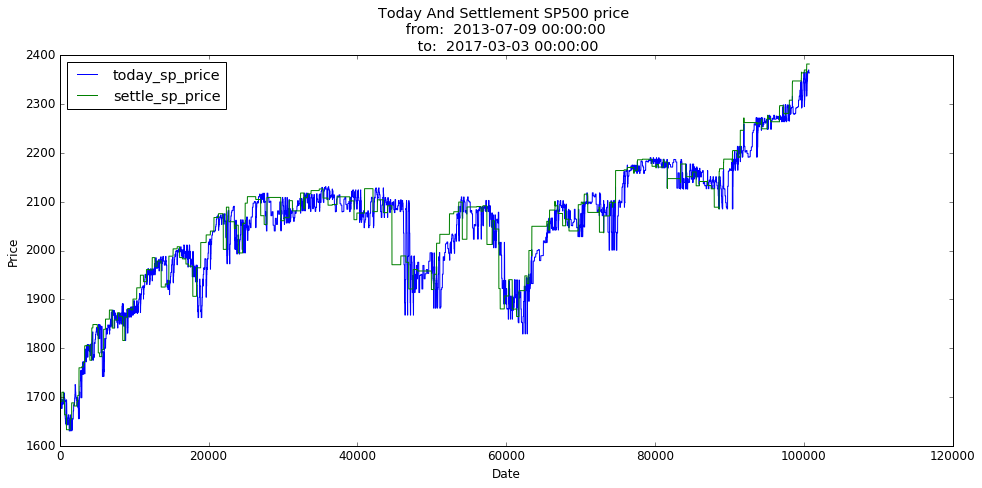

In [4]:
marker = itertools.cycle((',', '+', '.', 'o', '*'))
color = itertools.cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))

plt.clf()
plt.close()
fig = plt.figure(figsize=(16,7), dpi = 2000)
ax = fig.add_subplot(111)


ax.plot(spx_df_relevant_options['today_sp_price'], color=color.next())

ax.plot(spx_df_relevant_options['settle_sp_price'], color=color.next())
ax.set_ylim(1600, 2400)
ax.legend(loc='best')
ax.set_xlabel('Date')
ax.set_ylabel("Price")
ax.set_title("Today And Settlement SP500 price \n from:  "+str(spx_df_relevant_options.todaydate[:1][0])+" \n to:  "+str(spx_df_relevant_options.settledate.iloc[-1:][num_options-1]))


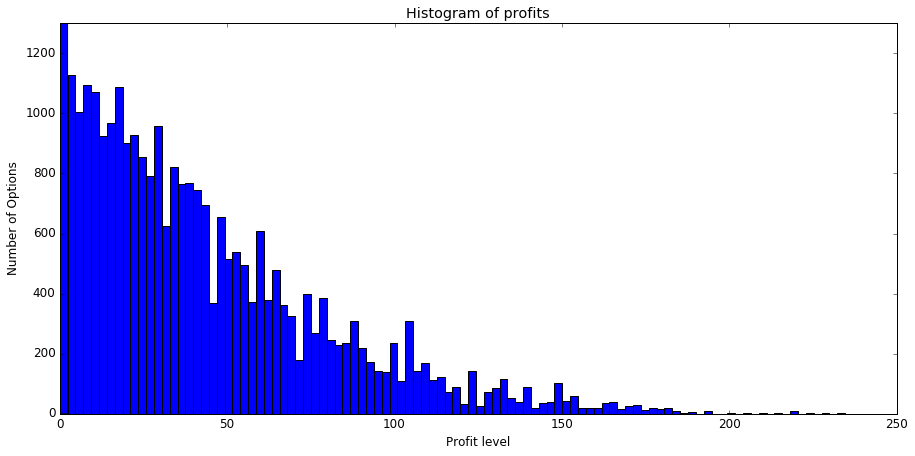

In [5]:
def option_profit(row):
    if row['optiontype'] == "put":
        return max(float(row['optionstrike']-row['settle_sp_price']), 0)
    elif row['optiontype'] == "call":
        return max(float(row['settle_sp_price']-row['optionstrike']), 0)
        


profit = spx_df_relevant_options.apply(lambda row: option_profit(row), axis=1)

plt.clf()
plt.close()


plot1 = plt.figure(figsize=(15,7), dpi = 2000)
ax = plot1.add_subplot(111)
ax.set_ylim(0,1300)

plt.hist(profit[profit<2000], bins=100)

ax.set_xlabel('Profit level')
ax.set_ylabel("Number of Options")
plt.title('Histogram of profits')



def multiclass_optionvalue(row):
    if row == 0:
        return 0
    elif row > 0 and row < 50:
        return 1
    elif row > 50 and row < 100:
        return 2
    elif row > 100 and row < 150:
        return 3
    elif row > 150 and row < 200:
        return 4
    elif row > 200:
        return 5
    


multiclasses_optionvalue = profit.apply(lambda row: multiclass_optionvalue(row))
spx_df_relevant_options['multiclasses_optionvalue'] = multiclasses_optionvalue


1.08257762458
0.913804912388


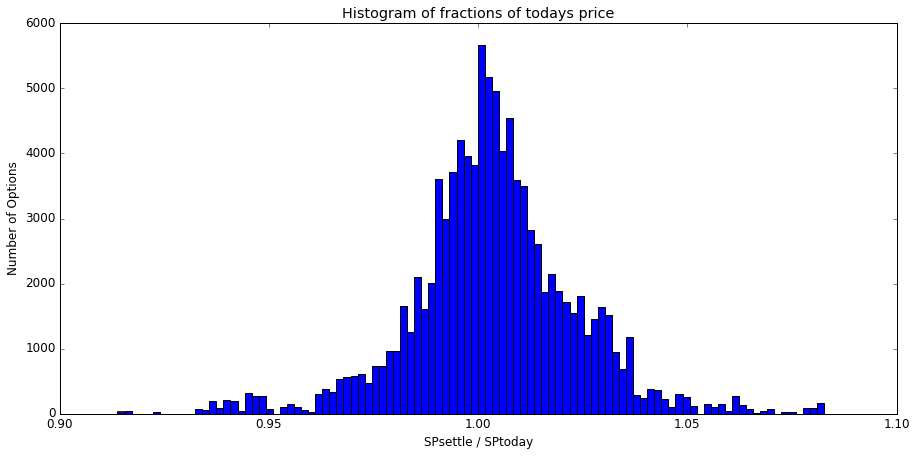

In [43]:
#Fraction spsettle/sptoday

def fraction_sp_settletoday(row):
    return float(row['settle_sp_price']) / float(row['today_sp_price'])


sp_settletoday_fraction = spx_df_relevant_options.apply(lambda row: fraction_sp_settletoday(row), axis=1)

spx_df_relevant_options['sp_settletoday_fraction'] = sp_settletoday_fraction


print max(sp_settletoday_fraction) #1.08257762458
print min(sp_settletoday_fraction) #0.913804912388


plt.clf()
plt.close()


plot1 = plt.figure(figsize=(15,7), dpi = 2000)
ax = plot1.add_subplot(111)
#ax.set_ylim(0,4000)

plt.hist(sp_settletoday_fraction, bins=100)

ax.set_xlabel('SPsettle / SPtoday')
ax.set_ylabel("Number of Options")
plt.title('Histogram of fractions of todays price')



In [7]:
#Design Matrix: number of samples(Feature Vector) x number of features
#Response Matrix: number of samples x 1
des_mat = spx_df_relevant_options.as_matrix(['daystosettle', 'opttype_bin', 'optionstrike', 'optionclosingprice',
                                  'optionhighprice','optionlowprice','optionopenint'])



def multiclass_fraction(row):
    if row < 0.997:
        return 0
    elif row >= 0.997 and row <= 1.009:
        return 1
    elif row > 1.009:
        return 2



multiclasses_fraction = sp_settletoday_fraction.apply(lambda row: multiclass_fraction(row))
spx_df_relevant_options['multiclasses_fraction'] = multiclasses_fraction


#:::::::: EITHER :::::::::::::
#Predict Option Value
# resp_mat = spx_df_relevant_options.as_matrix(['multiclasses_optionvalue'])
# resp_mat = resp_mat[:,0]


#::::::::  OR :::::::::::::
#sum(multiclasses_optionvalue == multiclasses_fraction) #29344 out of 31910 are equal
#Predict (settle_sp_price as fraction of today_sp_price)
resp_mat = spx_df_relevant_options.as_matrix(['multiclasses_fraction'])
resp_mat = resp_mat[:,0]


#(31910, 7) des_mat
#(31910,) resp_mat

print "Number of examples for class 0: ", sum(multiclasses_fraction==0)
print "Number of examples for class 1: ", sum(multiclasses_fraction==1)
print "Number of examples for class 2: ", sum(multiclasses_fraction==2)

Number of examples for class 0:  33728
Number of examples for class 1:  32064
Number of examples for class 2:  34950


0.847766581441
oobscore 0.843281923641
Test accuracy:  0.847766581441
Training accuracy:  0.999985184527


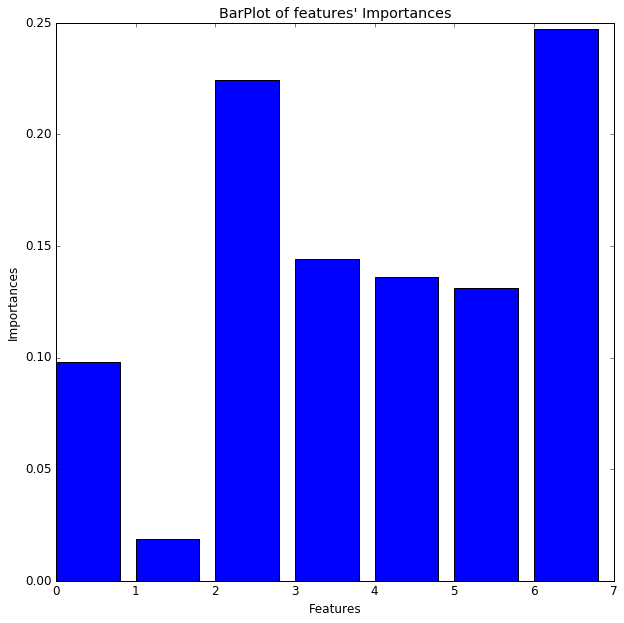

In [8]:
def plotBar(yvalues, pdfname, nfeatures, yname, output_path):
        #from matplotlib.backends.backend_pdf import PdfPages
        #pp = PdfPages(pdfname+'_BarPlotfeatures'+yname+'.pdf')
        plt.clf()
        plt.close()
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)

        ax.bar(range(0,nfeatures), yvalues)

        ax.set_title('BarPlot of features\' '+yname)
        if nfeatures>40:
            ax.set_xticks(np.arange(0,nfeatures, 2))
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(5) 

        ax.set_xlabel('Features')
        ax.set_ylabel(yname)

        plt.savefig(output_path+'/'+pdfname+'_BarPlotfeatures'+yname+'.pdf')
        #pp.savefig(fig)
        #pp.close()
        


output_path="./"

X_train, X_test, y_train, y_test = train_test_split(des_mat, resp_mat, test_size=0.33)

# print X_train.shape
# print X_test.shape
# print y_train.shape
# print y_test.shape


regres = RandomForestClassifier(n_estimators=50, max_features="sqrt", n_jobs=-1, oob_score = True)
fweight = np.repeat(1, des_mat.shape[1])


regres.fit(X_train, y_train, feature_weight = fweight)

pred = regres.predict(X_test)
pred_train = regres.predict(X_train)

#double-check
print float(sum(y_test == pred))/pred.shape[0]

print "oobscore", regres.oob_score_


importances = regres.feature_importances_
#print importances



pscore = metrics.accuracy_score(y_test, pred)
pscore_train = metrics.accuracy_score(y_train, pred_train)

print "Test accuracy: ", pscore
print "Training accuracy: ", pscore_train


plotBar(fweight, "", des_mat.shape[1], "Weights", output_path)
plotBar(importances, "", des_mat.shape[1], "Importances", output_path)

(0.0, 0.40000000000000002)

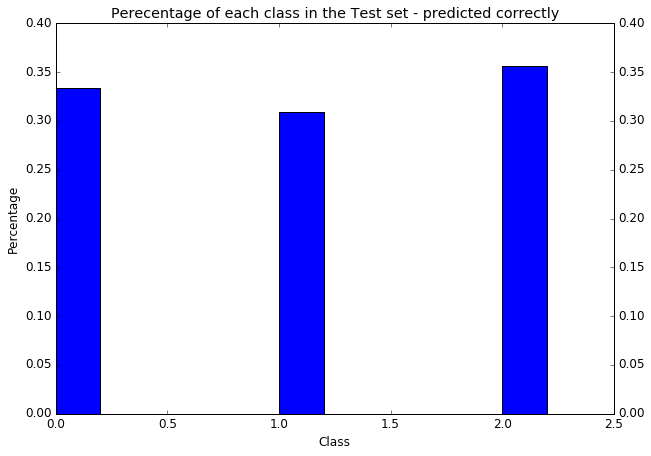

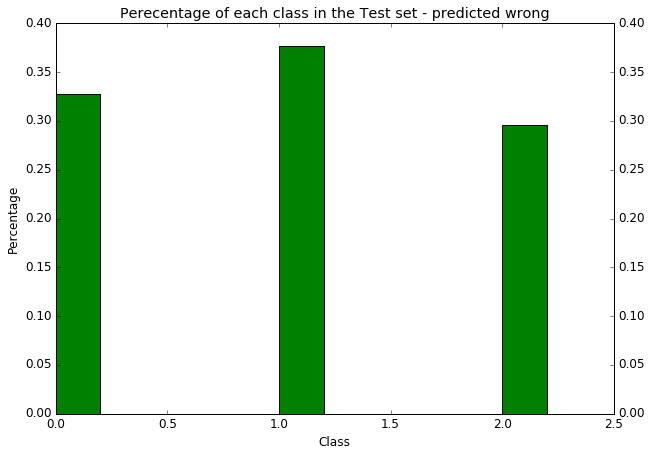

In [42]:
#Distribution of training and test set:

plt.clf()
plt.close()

plot1 = plt.figure(figsize=(10,7), dpi = 2000)
ax = plot1.add_subplot(111)
indxes = np.where(y_test == pred)[0]
distribution = y_test[indxes]
ax.set_xlabel('Class')
ax.set_ylabel("Percentage")
plt.title('Perecentage of each class in the Test set - predicted correctly')
ind = np.arange(3)
width = 0.2
tot_dim_distr = len(distribution)
class0 = sum(distribution==0)
class1 = sum(distribution==1)
class2 = sum(distribution==2)
percent = (float(class0)/float(tot_dim_distr), float(class1)/float(tot_dim_distr), float(class2)/float(tot_dim_distr))
rects1 = ax.bar(ind, percent, width, color='b')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())





plot1 = plt.figure(figsize=(10,7), dpi = 2000)
ax = plot1.add_subplot(111)
indxes = np.where(y_test != pred)[0]
distribution = y_test[indxes]
ax.set_xlabel('Class')
ax.set_ylabel("Percentage")
plt.title('Perecentage of each class in the Test set - predicted wrong')
ind = np.arange(3)
width = 0.2
tot_dim_distr = len(distribution)
class0 = sum(distribution==0)
class1 = sum(distribution==1)
class2 = sum(distribution==2)
percent = (float(class0)/float(tot_dim_distr), float(class1)/float(tot_dim_distr), float(class2)/float(tot_dim_distr))
rects1 = ax.bar(ind, percent, width, color='g')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())


Mean squared error - Test Set: 291.201462
Variance score: 0.98
Mean squared error - Training Set: 44.486689
Variance score: 1.00


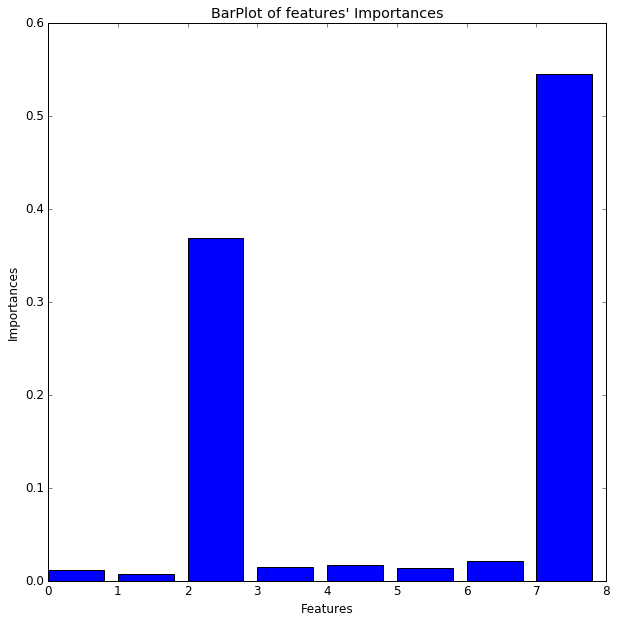

In [77]:
##########    REGRESSION     ##########

des_mat = spx_df_relevant_options.as_matrix(['daystosettle', 'opttype_bin', 'optionstrike', 'optionclosingprice',
                                  'optionhighprice','optionlowprice','optionopenint', 'today_sp_price'])
resp_mat = spx_df_relevant_options.as_matrix(['settle_sp_price'])



resp_mat = resp_mat[:,0]

def plotBar(yvalues, pdfname, nfeatures, yname, output_path):
        #from matplotlib.backends.backend_pdf import PdfPages
        #pp = PdfPages(pdfname+'_BarPlotfeatures'+yname+'.pdf')
        plt.clf()
        plt.close()
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)

        ax.bar(range(0,nfeatures), yvalues)

        ax.set_title('BarPlot of features\' '+yname)
        if nfeatures>40:
            ax.set_xticks(np.arange(0,nfeatures, 2))
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(5) 

        ax.set_xlabel('Features')
        ax.set_ylabel(yname)

        plt.savefig(output_path+'/'+pdfname+'_BarPlotfeatures'+yname+'.pdf')
        #pp.savefig(fig)
        #pp.close()
        

output_path="./"

X_train, X_test, y_train, y_test = train_test_split(des_mat, resp_mat, test_size=0.33)

regres = RandomForestRegressor(n_estimators=50, max_features="sqrt", n_jobs=-1, oob_score = True)
fweight = np.repeat(1,des_mat.shape[1])


regres.fit(X_train, y_train, feature_weight = fweight)


pred = regres.predict(X_test)
print("Mean squared error - Test Set: %.6f"
      % np.mean((pred - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regres.score(X_test, y_test))

pred_train = regres.predict(X_train)
print("Mean squared error - Training Set: %.6f"
      % np.mean((pred_train - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regres.score(X_train, y_train))


importances = regres.feature_importances_


plotBar(fweight, "", des_mat.shape[1], "Weights", output_path)
plotBar(importances, "", des_mat.shape[1], "Importances", output_path)

